In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

<Axes: xlabel='x', ylabel='y'>

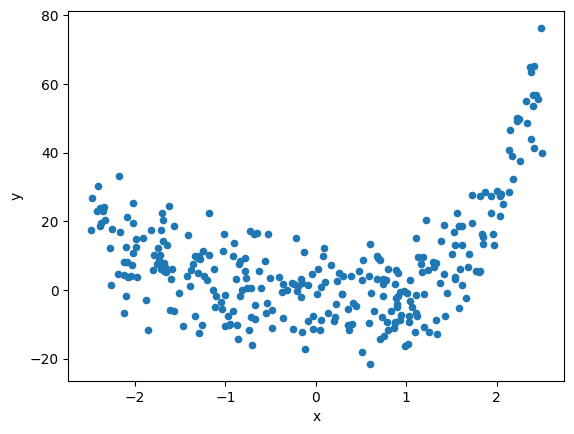

In [12]:
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')

In [7]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [8]:
X_training, X_test, y_training, y_test = train_test_split(X,y,test_size=0.2)

In [9]:
print(len(X_training),len(y_training),len(X_test),len(y_test))

240 240 60 60


In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_training,y_training)
pred_lr = lr.predict(X_test)

# mse
mse_lr_training = mean_squared_error(y_training, lr.predict(X_training))
mse_lr_test = mean_squared_error(y_test, pred_lr)
print(mse_lr_training, mse_lr_test)

259.04421683132375 269.93733248903493


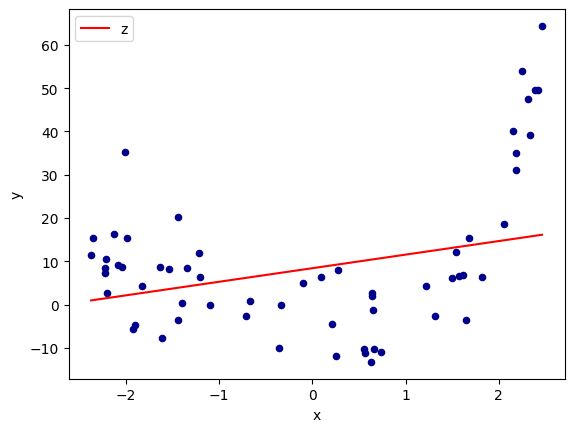

In [52]:
df = pd.DataFrame({'x': X_test.flatten(), 'y': y_test.flatten(), 'z': pred_lr.flatten()})
df = df.sort_values(by='x')
ax=df.plot(kind='scatter', x='x', y='y', color='DarkBlue')
df.plot(kind='line', x='x', y='z', color='Red', ax=ax);

In [23]:
import sklearn.neighbors
knn_reg_3 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
_ = knn_reg_3.fit(X_training, y_training)
kn_pr_3 = knn_reg_3.predict(X_test)

# mse
mse_kn_pr_3_training = mean_squared_error(y_training, knn_reg_3.predict(X_training))
mse_kn_pr_3_test = mean_squared_error(y_test, kn_pr_3)
print(mse_kn_pr_3_training, mse_kn_pr_3_test)

39.935056434268304 87.01533490034298


In [35]:
knn_reg_5 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
_ = knn_reg_5.fit(X_training, y_training)
kn_pr_5 = knn_reg_5.predict(X_test)

# mse
mse_kn_pr_5_training = mean_squared_error(y_training, knn_reg_5.predict(X_training))
mse_kn_pr_5_test = mean_squared_error(y_test, kn_pr_5)
print(mse_kn_pr_5_training, mse_kn_pr_5_test)

38.772895584671915 100.10993704624109


In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly_2 = poly_features_2.fit_transform(X_training)
print(X_training[0], X_poly_2[0])
lin_reg_2 = LinearRegression()
_ = lin_reg_2.fit(X_poly_2, y_training)

X_poly_test_2 = poly_features_2.fit_transform(X_test)
poly_pr_2 = lin_reg_2.predict(X_poly_test_2)

# mse
mse_poly_pr_2_training = mean_squared_error(y_training, lin_reg_2.predict(X_poly_2))
mse_poly_pr_2_test = mean_squared_error(y_test, poly_pr_2)
print(mse_poly_pr_2_training, mse_poly_pr_2_test)

[-0.10209832] [-0.10209832  0.01042407]
88.89752756331956 103.31730809869879


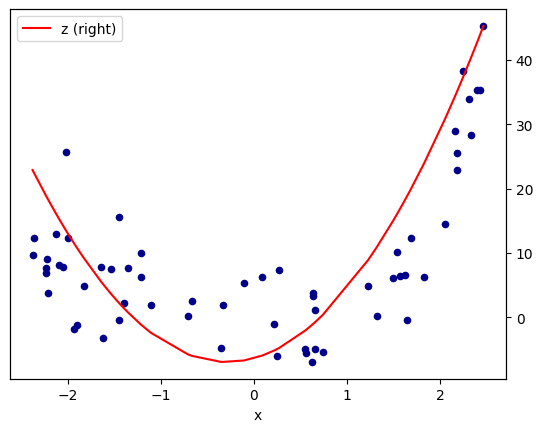

In [46]:
df = pd.DataFrame({'x': X_test.flatten(), 'y': y_test.flatten(), 'z': poly_pr_2.flatten()})
df = df.sort_values(by='x')
ax=df.plot(kind='scatter', x='x', y='y', color='DarkBlue')
df.plot.line( x='x', y='z', secondary_y=True, color='Red', ax=ax);

In [39]:
poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly_3 = poly_features_3.fit_transform(X_training)
print(X_training[0], X_poly_3[0])
lin_reg_3 = LinearRegression()
_ = lin_reg_3.fit(X_poly_3, y_training)

X_poly_test_3 = poly_features_3.fit_transform(X_test)
poly_pr_3 = lin_reg_3.predict(X_poly_test_3)

# mse
mse_poly_pr_3_training = mean_squared_error(y_training, lin_reg_3.predict(X_poly_3))
mse_poly_pr_3_test = mean_squared_error(y_test, poly_pr_3)
print(mse_poly_pr_3_training, mse_poly_pr_3_test)

[-0.96907022] [-0.96907022  0.93909708 -0.91005101]
65.51042179925857 68.09766083070953


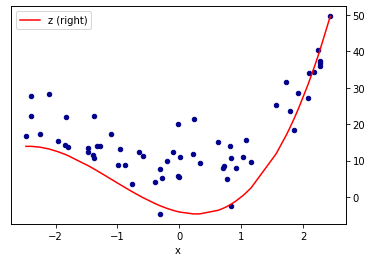

In [40]:
df = pd.DataFrame({'x': X_test.flatten(), 'y': y_test.flatten(), 'z': poly_pr_3.flatten()})
df = df.sort_values(by='x')
ax=df.plot(kind='scatter', x='x', y='y', color='DarkBlue')
df.plot(kind='line', x='x', y='z', secondary_y=True, color='Red', ax=ax);

In [41]:
poly_features_4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly_4 = poly_features_4.fit_transform(X_training)
print(X_training[0], X_poly_4[0])
lin_reg_4 = LinearRegression()
_ = lin_reg_4.fit(X_poly_4, y_training)

X_poly_test_4 = poly_features_4.fit_transform(X_test)
poly_pr_4 = lin_reg_4.predict(X_poly_test_4)

# mse
mse_poly_pr_4_training = mean_squared_error(y_training, lin_reg_4.predict(X_poly_4))
mse_poly_pr_4_test = mean_squared_error(y_test, poly_pr_4)
print(mse_poly_pr_4_training, mse_poly_pr_4_test)

[-0.96907022] [-0.96907022  0.93909708 -0.91005101  0.88190333]
54.05419211661858 70.48785829317802


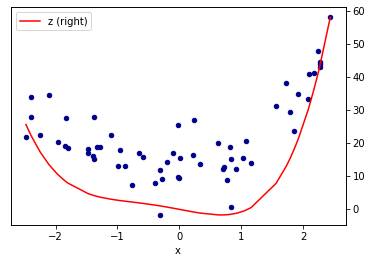

In [42]:
df = pd.DataFrame({'x': X_test.flatten(), 'y': y_test.flatten(), 'z': poly_pr_4.flatten()})
df = df.sort_values(by='x')
ax=df.plot(kind='scatter', x='x', y='y', color='DarkBlue')
df.plot(kind='line', x='x', y='z', secondary_y=True, color='Red', ax=ax);

In [43]:
poly_features_5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly_5 = poly_features_5.fit_transform(X_training)
print(X_training[0], X_poly_5[0])
lin_reg_5 = LinearRegression()
_ = lin_reg_5.fit(X_poly_5, y_training)

X_poly_test_5 = poly_features_5.fit_transform(X_test)
poly_pr_5 = lin_reg_5.predict(X_poly_test_5)

# mse
mse_poly_pr_5_training = mean_squared_error(y_training, lin_reg_5.predict(X_poly_5))
mse_poly_pr_5_test = mean_squared_error(y_test, poly_pr_5)
print(mse_poly_pr_5_training, mse_poly_pr_5_test)

[-0.96907022] [-0.96907022  0.93909708 -0.91005101  0.88190333 -0.85462625]
53.34280935078219 73.46808266561179


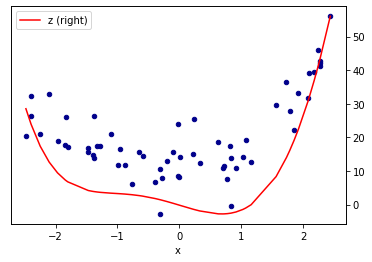

In [44]:
df = pd.DataFrame({'x': X_test.flatten(), 'y': y_test.flatten(), 'z': poly_pr_5.flatten()})
df = df.sort_values(by='x')
ax=df.plot(kind='scatter', x='x', y='y', color='DarkBlue')
df.plot(kind='line', x='x', y='z', secondary_y=True, color='Red', ax=ax);

In [70]:
import pickle
data = np.array([['lin_reg', mse_lr_training, mse_lr_test],
       ['knn_3_reg', mse_kn_pr_3_training, mse_kn_pr_3_test],
       ['knn_5_reg', mse_kn_pr_5_training, mse_kn_pr_5_test],
       ['poly_2_reg', mse_poly_pr_2_training, mse_poly_pr_2_test],
       ['poly_3_reg', mse_poly_pr_3_training, mse_poly_pr_3_test],
       ['poly_4_reg', mse_poly_pr_4_training, mse_poly_pr_4_test],
       ['poly_5_reg', mse_poly_pr_5_training, mse_poly_pr_5_test],])
summary = pd.DataFrame(data[:,1:3], index=data[:,0],columns=['train_mse','test_mse'])
    
summary.to_pickle('mse.pkl')

,train_mse,test_mse
lin_reg,203.60062747985103,254.33114400627719
knn_3_reg,31.45879736382897,102.28337066011446
knn_5_reg,38.772895584671915,100.10993704624109
poly_2_reg,83.38539947276489,81.2692471659093
poly_3_reg,65.51042179925857,68.09766083070953
poly_4_reg,54.05419211661858,70.48785829317802
poly_5_reg,53.34280935078219,73.46808266561179


In [69]:

reggressors = [(lr,None),(knn_reg_3,None),(knn_reg_5,None), (lin_reg_2,
poly_features_2), (lin_reg_3, poly_features_3), (lin_reg_4, poly_features_4),
(lin_reg_5, poly_features_5)]

with open('reg.pkl', 'wb') as handle:
    pickle.dump(reggressors, handle)